In [1]:
import torch

In [2]:
# Prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])

In [3]:
# Design model using Class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()

In [4]:
# construct loss and optimizer
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

$$
\frac{\theta{cost}}{\theta{\omega}} = \frac{1}{N}\sum_{n=1}^{N}2 \cdot{x_n} \cdot({x_n}\cdot{\omega} - y_n)
$$

In [5]:
# Training cycle
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
#     print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

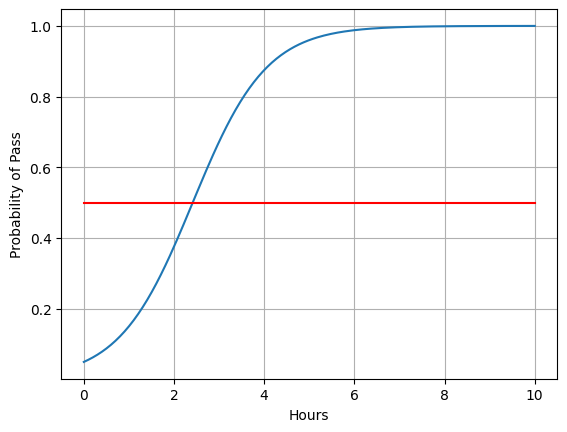

In [7]:
# Result of Logistic Regression
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view(200, 1)
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()